## The Best Neighborhood (Trees)

### Introduction

**Objective**:  
The goal of this project is to identify the best neighborhood in Pittsburgh by analyzing the environmental and economic benefits provided by trees. This analysis will combine data on air quality improvements and carbon dioxide reductions with the economic value derived from these trees.

**Approach**:  
We will quantify the benefits using a composite metric that integrates both environmental and economic impacts of trees. The metric considers the number of trees, air quality benefits in lbs, and economic benefits in dollars.

**Process Overview**:  
Initially, we considered several metrics, including green space per capita and public satisfaction ratings. However, due to the availability of detailed tree-related data, we decided to focus on the direct quantifiable benefits trees bring to each neighborhood.

### The Metric

**Definition**:  
Our metric integrates:
- **Environmental Score**: Based on the total pounds of air pollutants removed and CO2 sequestered by trees.
- **Economic Score**: Based on the dollar value of environmental benefits provided by trees.

**Data Sources**:  
- **City of Pittsburgh Neighborhoods Shapefile**: Provides the geographical boundaries of Pittsburgh neighborhoods.
- **Tree Data CSV**: Contains detailed records of trees, including their neighborhood, air quality benefits, and economic value. From the source: [City of Pittsburgh Trees](https://data.wprdc.org/dataset/city-trees)

**Computation**:  
We calculate the total environmental and economic benefits for each neighborhood. These benefits are then standardized on a one-point scale, where the neighborhood with the highest benefit scores 1, and others are compared against it. The final score for each neighborhood is a weighted sum of its environmental (70%) and economic (30%) scores.

### Rough Estimation by Number of Trees

**Metric Application(Number of Trees)**:  


In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

city_pitts_gdf = gpd.read_file("City_of_Pittsburgh_Neighborhoods.shp")
# city_pitts_gdf.plot()

!cat trees_part_* > trees.csv
tree_data = pd.read_csv('trees.csv', low_memory = False)

#set frequency of trees to city_pitts_gdf
tree_counts = tree_data['neighborhood'].value_counts()
city_pitts_gdf['tree_count'] = city_pitts_gdf['HOOD'].map(tree_counts).fillna(0)


**Map of Pittsburgh(Neighborhood)**

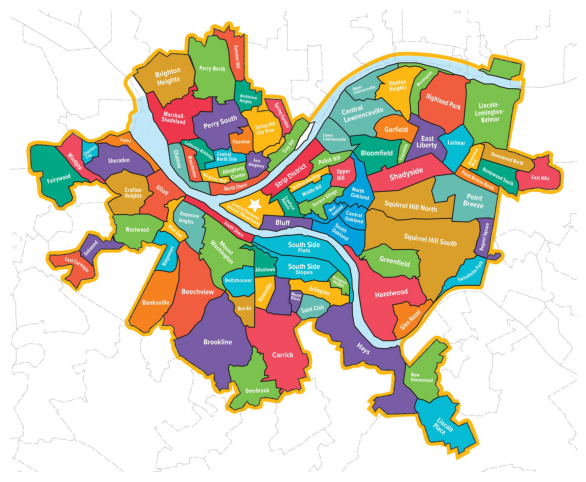

In [3]:
img = plt.imread('Map.jpg') 
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off') 
plt.show()

**Data Visualization(Number of Trees)**:  

<Axes: >

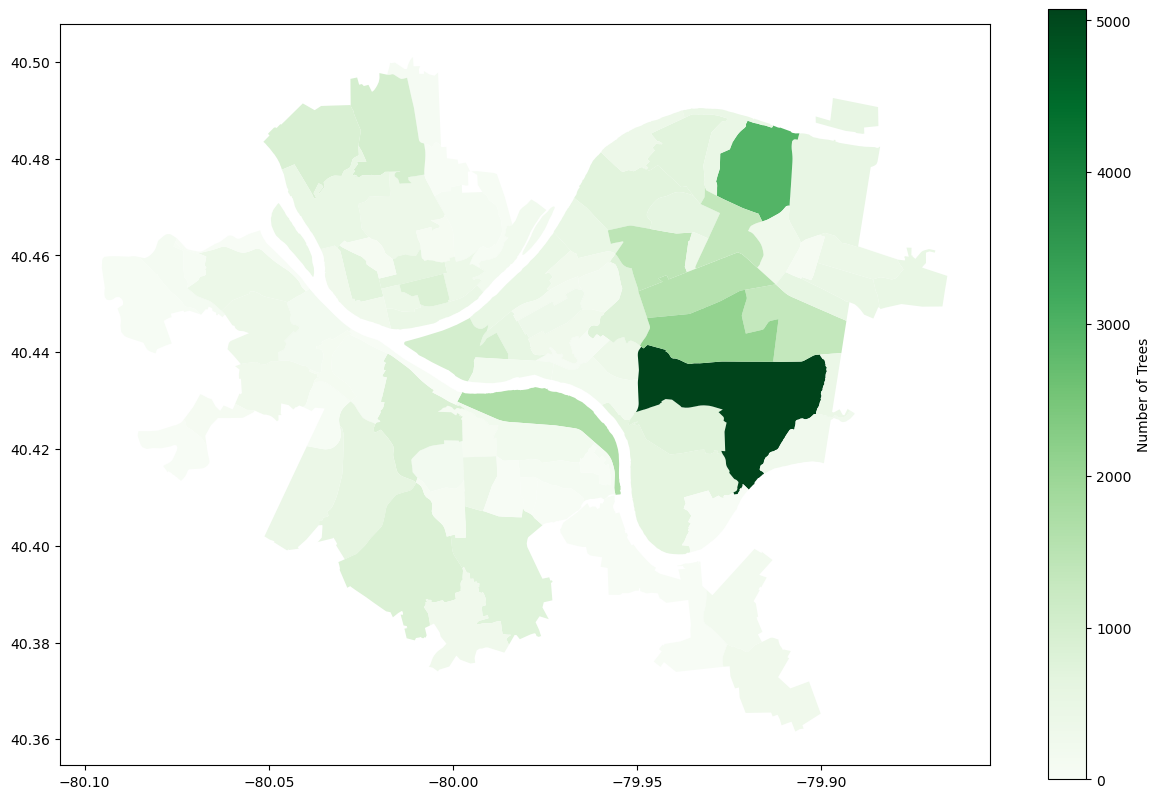

In [4]:
city_pitts_gdf.plot(column = 'tree_count', legend = True, cmap = "Greens", figsize=(15, 10), legend_kwds={"label": "Number of Trees"})

This map presents a heatmap of tree density across the neighborhoods, clearly indicating that Squirrel Hill South has the highest concentration of trees. However, it's important to note that the number and density of trees alone do not directly determine the quality of the environment. To fully assess the environmental health of a neighborhood, we must consider additional factors that contribute to its overall ecological balance and livability. 


### Precise Estimation(Environmental & Economic)

In the following sections, we will explore environmental benefits quantified in pounds (lbs) and economic benefits expressed in dollars. These metrics will provide a more comprehensive understanding of each neighborhood's contribution to environmental sustainability and economic value. By examining both the weight of pollutants removed and the monetary value of these environmental services, we can gain deeper insights into the true ecological and financial impacts of urban forestry efforts within Pittsburgh's neighborhoods.

### Data Dictionary（part）

In [5]:
data = pd.read_csv('data_dictionary.csv')


rows_to_display = data.iloc[[37, 45, 46, 47]]
print(rows_to_display)


    _id                             id   type
37   38  air_quality_benfits_total_lbs  float
45   46      co2_benefits_totalco2_lbs  float
46   47  overall_benefits_dollar_value  float
47   48                   neighborhood   text


**Metric Application(Environmental Benefits of Trees)**:  

In [6]:
#caculate the total benefits(lbs)
tree_data['total_benefits_lbs'] = tree_data['air_quality_benfits_total_lbs']+tree_data['co2_benefits_totalco2_lbs']
benefit_per_neighborhood_lbs = tree_data.groupby('neighborhood')['total_benefits_lbs'].sum()

**Data Visualization(Environmental Benefits of Trees)**:  

<Axes: >

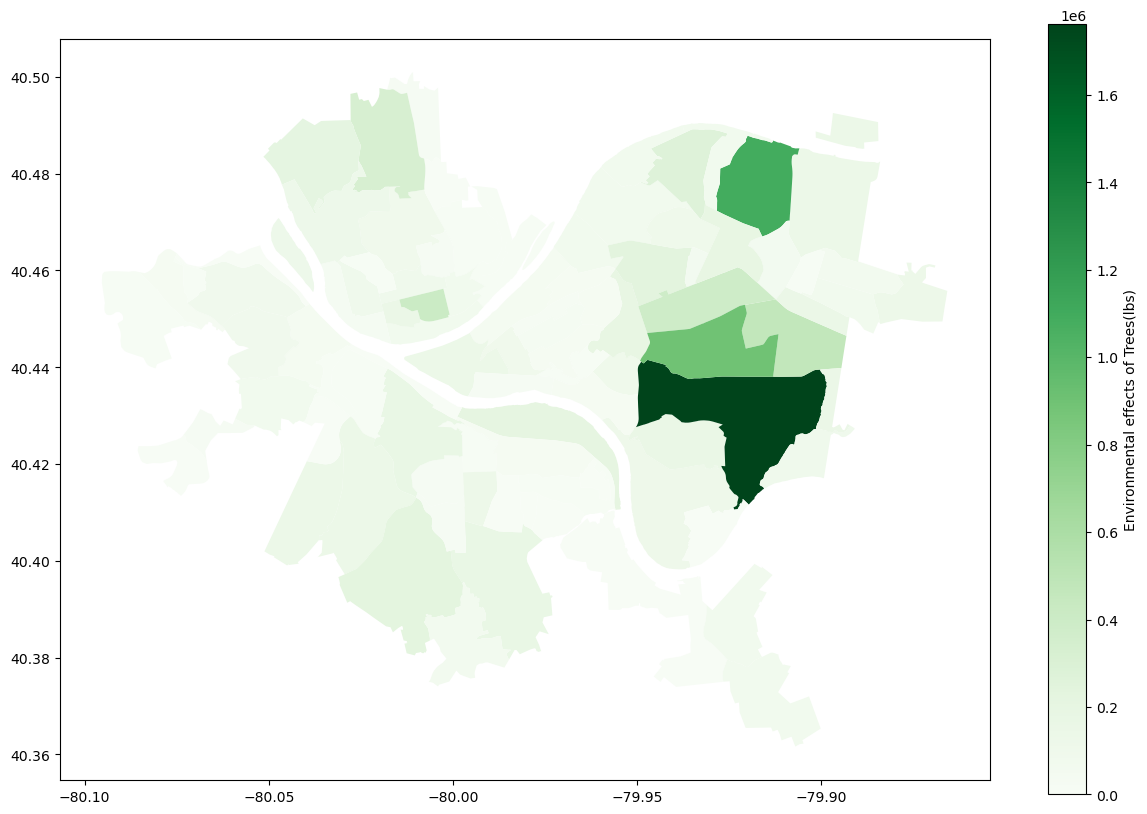

In [7]:
#plot
city_pitts_gdf['benefit_lbs'] = city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_lbs).fillna(0)
city_pitts_gdf.plot(column = 'benefit_lbs', legend = True, cmap = "Greens", figsize=(15, 10), legend_kwds={"label": "Environmental effects of Trees(lbs)"})

Despite the overwhelming victory of the top-ranked neighborhood, it is notable that South Side Flats, Brighton Heights, East Liberty, and Bloomfield do not exhibit the same level of competitiveness within their peer groups as their tree counts might suggest. Specifically, in terms of environmental benefits measured in pounds (lbs), these neighborhoods fall short. This observation underscores the importance of considering multiple factors when assessing neighborhood quality. It highlights that while the number of trees is a significant component, it does not solely dictate the overall environmental efficacy and reinforces the necessity for a multi-faceted approach in our evaluation.

**Metric Application(Economic Benefits of Trees)**:  

In [8]:
#caculate the total benefits(dollars)
benefit_per_neighborhood_dollars = tree_data.groupby('neighborhood')['overall_benefits_dollar_value'].sum()


**Data Visualization(Economic Benefits of Trees)**:

<Axes: >

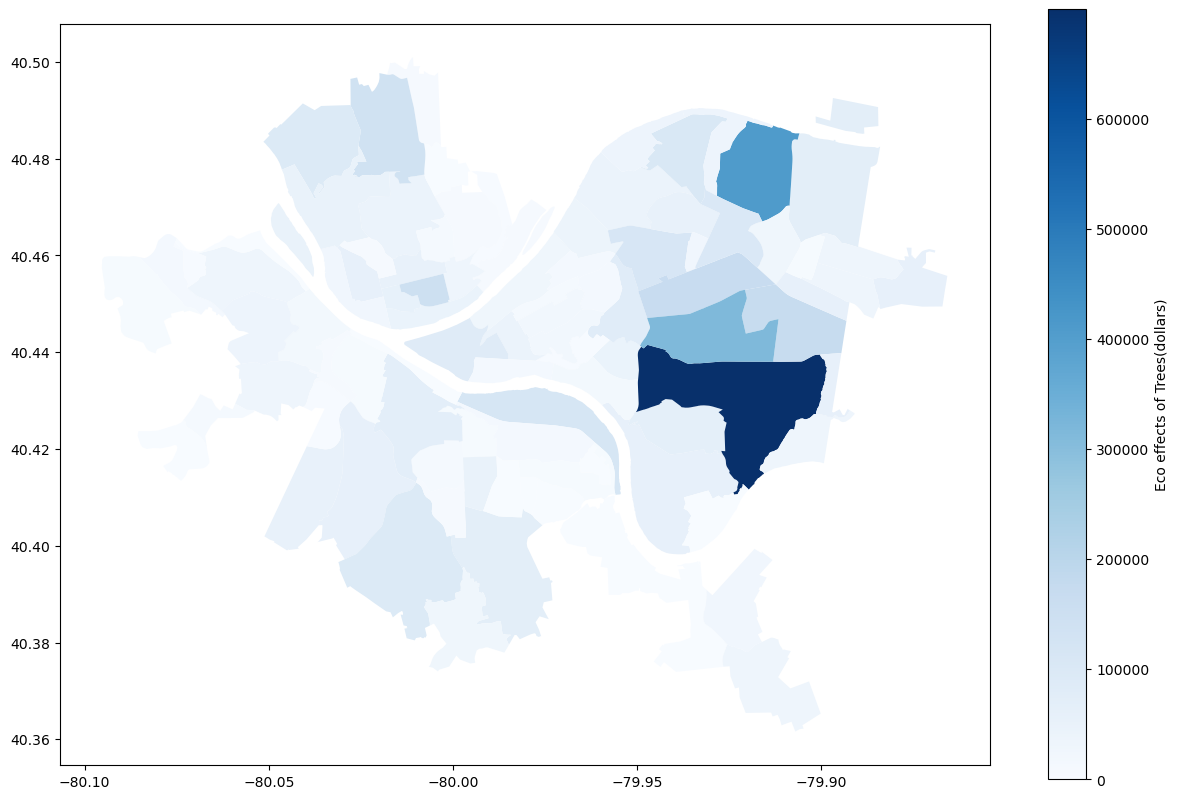

In [9]:
#plot
city_pitts_gdf['benefit_dollars'] = city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_dollars).fillna(0)
city_pitts_gdf.plot(column = 'benefit_dollars', legend = True, cmap = "Blues", figsize=(15, 10), legend_kwds={"label": "Eco effects of Trees(dollars)"})

After plotting the heatmap of economic benefits measured in dollars, we observed that, aside from minor fluctuations in neighborhoods such as Shadyside and East Liberty, the environmental benefits quantified in pounds largely predict the economic benefits. This correlation shows a proportional relationship, where higher environmental contributions through tree-related services tend to coincide with greater economic returns. This trend not only supports the value of investing in urban forestry but also illustrates how ecological improvements can directly enhance economic outcomes for neighborhoods.

### Rank & Overall Score 

Initially, heatmaps provide a comprehensive visual analysis of tree data, allowing us to quickly grasp the distribution of benefits across neighborhoods. However, relying solely on the visual interpretation of color gradients can be overly subjective, as the intensity of colors may lead to ambiguous conclusions. To address this and ensure compatibility with other datasets, we have implemented a percentile-based weighting system to calculate the scores for each neighborhood. This approach standardizes our evaluation process, making it consistent and comparable across different data types. To clearly demonstrate the results and highlight the top-performing neighborhoods, we use bar charts, which offer a straightforward, visual representation of the top 10 neighborhoods based on their cumulative scores.

**Metric Application(Overall Score for Each Neighborhood)**:

In [10]:
# Find the maximum value for each benefit type to standardize
max_env = benefit_per_neighborhood_lbs.max()
max_eco = benefit_per_neighborhood_dollars.max()

# Calculate standardized scores
city_pitts_gdf['env_score'] = (city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_lbs) / max_env) 
city_pitts_gdf['eco_score'] = (city_pitts_gdf['HOOD'].map(benefit_per_neighborhood_dollars) / max_eco) 

# Calculate total score
city_pitts_gdf['total_score'] = city_pitts_gdf['env_score'] * 0.7 + city_pitts_gdf['eco_score'] * 0.3

# Sort by total score
top_10 = city_pitts_gdf.sort_values(by='total_score', ascending=False).head(20)


**Data Visualization(Overall Score for Each Neighborhood)**:  

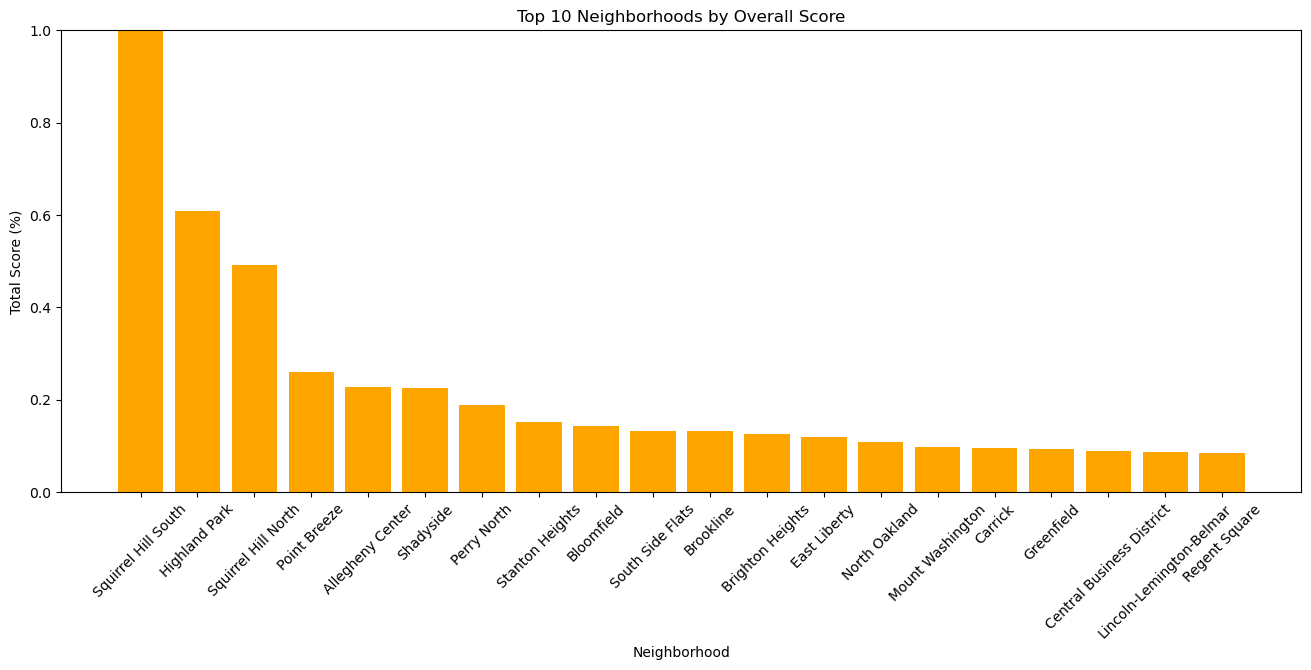

In [11]:
# plot
plt.figure(figsize=(16, 6))
plt.bar(top_10['HOOD'], top_10['total_score'], color='orange')
plt.xlabel('Neighborhood')
plt.ylabel('Total Score (%)')
plt.title('Top 10 Neighborhoods by Overall Score')
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.show()

In conclusion, Squirrel Hill South, as anticipated, emerged as the top performer in terms of environmental benefits. Closely following it were Highland Park and Squirrel Hill North, showcasing their strong environmental credentials as well. It's important to note that our evaluation is comprehensive, integrating various metrics to assess neighborhood quality. Therefore, while Squirrel Hill South leads in the environmental category, the overall competition encompasses multiple factors, and the final determination of the best neighborhood in Pittsburgh is yet to be concluded.

### Save The Data to a CSV File for Further Evaluation

In [12]:
# Save only the neighborhood and total score to a CSV file
city_pitts_gdf[['HOOD', 'total_score']].to_csv('neighborhood_total_scores.csv', index=False)


In [13]:
df = pd.read_csv('neighborhood_total_scores.csv')

# Print the DataFrame
print(df)

                    HOOD  total_score
0        Central Oakland     0.060793
1          North Oakland     0.108752
2           West Oakland     0.005350
3       Crawford-Roberts     0.054580
4         Strip District     0.031188
..                   ...          ...
86        Chartiers City     0.007559
87             Ridgemont     0.003590
88              West End     0.011415
89  California-Kirkbride     0.010434
90            Glen Hazel     0.000110

[91 rows x 2 columns]
